# data wrangling
data wrangling is the process of data cleaning ,transforming, and organizing data so that it can be used for analyzing and visualization.
. data wrangling helps to make data consistent, accurate and useful for analysis and decision making. 

##:
1. Gathering the data
2. cleans the data.
3. how to clean the data.

In [6]:
# import liabrai
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = sns.load_dataset('titanic')

In [8]:
df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.drop(columns='deck', inplace=True)

In [12]:
df['age'] = df.age.fillna(value=df['age'].mean())

In [13]:
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0])

In [14]:
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [339]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# out liers removal.
wesay usually pehlay log transform krty hn phr outliers remove krty hn.

## visualization wala maethod

<Axes: xlabel='sex', ylabel='age'>

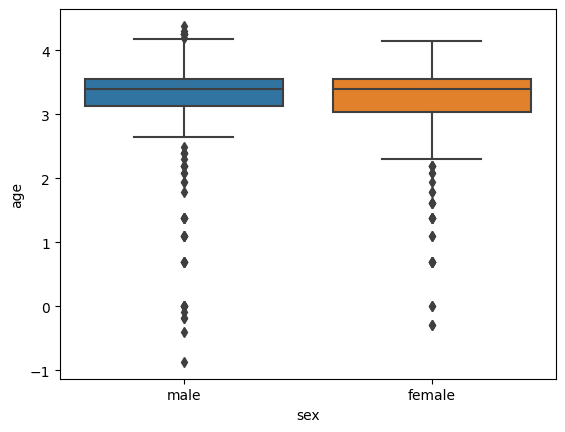

In [342]:
import seaborn as sns
sns.boxplot(data=df, y='age', x='sex')

# IQR METHOD

In [15]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['age'] > lower_bound) & (df['age']< upper_bound)]

In [345]:
df.shape

(813, 14)

In [16]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['fare'] > lower_bound) & (df['fare']< upper_bound)]

In [347]:
df.shape

(787, 14)

<Axes: xlabel='age', ylabel='Count'>

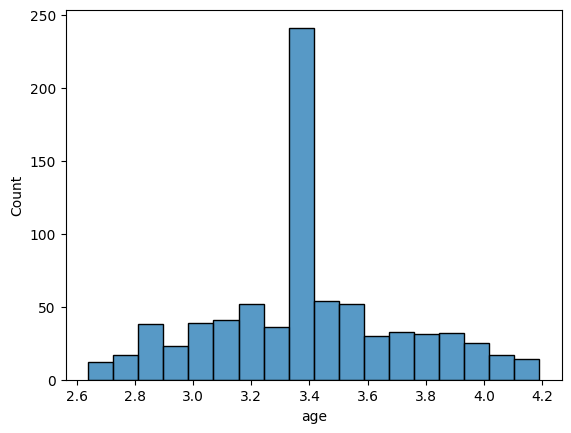

In [348]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

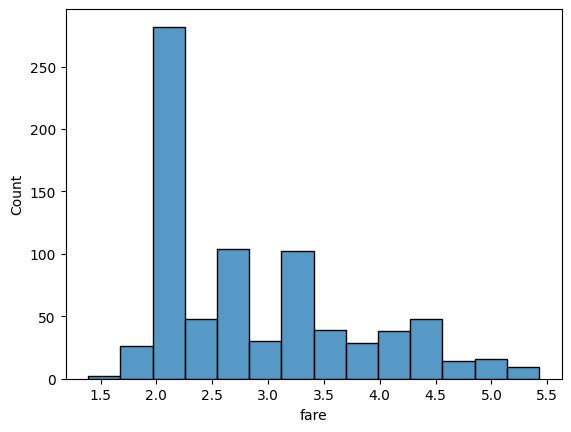

In [349]:
sns.histplot(df['fare'])

In [21]:
import scipy.stats as stats
import numpy as np
df = np.(df['age'])
stats.zscore(df)

SyntaxError: invalid syntax (2700359020.py, line 3)

In [ ]:
# z- score method --- assignment ha khud krna hai
import scipy.stats as stats
import numpy as np

zscore = np.abs(stats.zscore(df['age']))
threshold = 3 
df = df[(zscore< threshold).all(axis=1)]


In [350]:
df.shape

(787, 14)

In [351]:
# find duplicates
df.duplicated().sum()

104

In [229]:
# this way we can find duplicates
#df_duplicates=df[df.duplicated()]

#df_duplicates.head()

In [352]:
# fdroping the  duplicates
df.drop_duplicates(inplace = True)

In [353]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,Southampton,no,True


In [314]:
df.shape

(692, 14)

# data normalization
## bring data at one scale

In [315]:
# 1. import libraraoies
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#2  data
df
#3  select columns to normalize
cols_to_normalize =['age', 'fare']

# 4. create the scalar function
scaler = MinMaxScaler()

# 5, fit and transform the data on the saler

df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

# check the data

df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.374553,1,0,0.146511,S,Third,man,True,Southampton,no,False
1,1,1,female,0.669886,1,0,0.712570,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0.464823,0,0,0.168557,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.625447,1,0,0.639639,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.625447,0,0,0.172433,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.683922,0,5,0.490901,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.295333,0,0,0.498232,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.536703,1,2,0.437227,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.464823,0,0,0.498232,C,First,man,True,Cherbourg,yes,True


In [316]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,0.397399,2.236994,0.538585,0.404624,0.316474,0.387162
std,0.489714,0.856686,0.191427,0.807620,0.788569,0.227422
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.421571,0.000000,0.000000,0.168557
50%,0.000000,3.000000,0.536703,0.000000,0.000000,0.318173
75%,1.000000,3.000000,0.659078,1.000000,0.000000,0.519000
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


In [317]:
# 1. import libraraoies
import pandas as pd
from sklearn.preprocessing import StandardScaler

#2  data
df
#3  select columns to normalize
cols_to_normalize =['age', 'fare']

# 4. create the scalar function
scaler = StandardScaler()

# 5, fit and transform the data on the saler

df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

# check the data

df
## note standardscaleer = minus mean with value and then divide with deviation
# range -3 to +3


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.857511,1,0,-1.058938,S,Third,man,True,Southampton,no,False
1,1,1,female,0.686405,1,0,1.431894,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.385605,0,0,-0.961926,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.454093,1,0,1.110974,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.454093,0,0,-0.944872,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.759783,0,5,0.456484,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-1.271647,0,0,0.488741,S,First,woman,False,Southampton,yes,True
888,0,3,female,-0.009838,1,2,0.220303,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.385605,0,0,0.488741,C,First,man,True,Cherbourg,yes,True


In [318]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,692.000000,692.000000,6.920000e+02,692.000000,692.000000,6.920000e+02
mean,0.397399,2.236994,3.799145e-16,0.404624,0.316474,1.540194e-17
std,0.489714,0.856686,1.000723e+00,0.807620,0.788569,1.000723e+00
min,0.000000,1.000000,-2.815564e+00,0.000000,0.000000,-1.703629e+00
25%,0.000000,1.000000,-6.117151e-01,0.000000,0.000000,-9.619265e-01
50%,0.000000,3.000000,-9.837838e-03,0.000000,0.000000,-3.035709e-01
75%,1.000000,3.000000,6.299044e-01,1.000000,0.000000,5.801283e-01
max,1.000000,3.000000,2.412146e+00,8.000000,6.000000,2.696673e+00


# Log transformstion..

## sab sy pehlay log transform krna hoga.. agar outliers remove  hua tu thek.. warna option second use ke minmax scalar.. stndardscalar etc
har method har data ky lie thek nae hota..
log se apki values aik same scale pr a jati hn based on your own data i-e choty scale pr aa jati hn .. no specific range 

In [238]:
import numpy as np

In [255]:
kashti = sns.load_dataset('titanic')
kashti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [254]:
kashti['age']= kashti['age'].fillna(kashti['age'].median())
kashti['fare']= kashti['fare'].fillna(kashti['fare'].median())

# start log transform
kashti['age'] = np.log(kashti['age'])    ## agr data ma age ki values zada zero ky qareeb hn tu log1p use hota ha.
kashti['fare'] = np.log(kashti['fare'])
kashti.head()

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

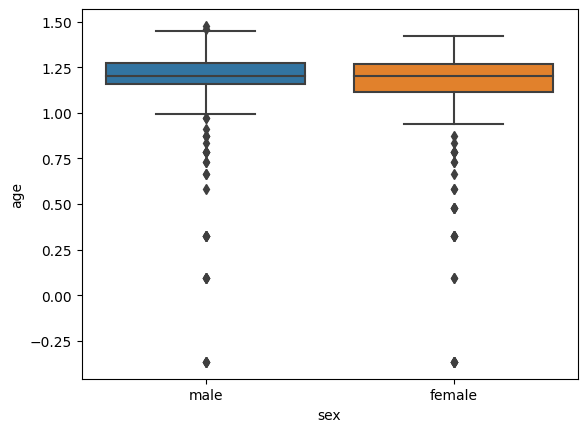

In [246]:
sns.boxplot(data = kashti, x = 'sex', y='age')
# ab age ka ziad gap ha jo k histplot sy pata chala ..
# is lye agar log kisi var pr suitable nae tu use some othermethod to scale data.

<Axes: xlabel='age', ylabel='Count'>

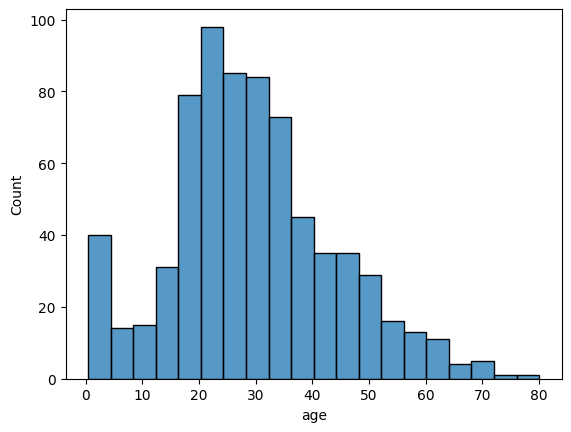

In [256]:
sns.histplot(kashti['age'])
# qk age ka difference ziada ha islye log is pr kam nae krega.
# har method har data kylie nae hota.

<Axes: xlabel='sex', ylabel='fare'>

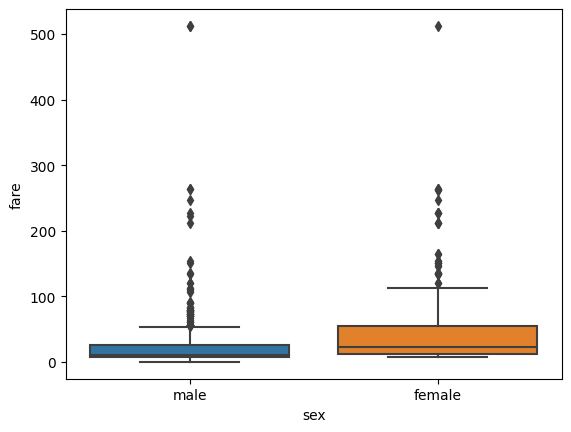

In [257]:
sns.boxplot(data = kashti, x = 'sex', y='fare')

# Organizing the Data

In [354]:
df['family-size'] = df['sibsp'] + df ['parch']

In [355]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family-size'],
      dtype='object')

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='survived'>

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


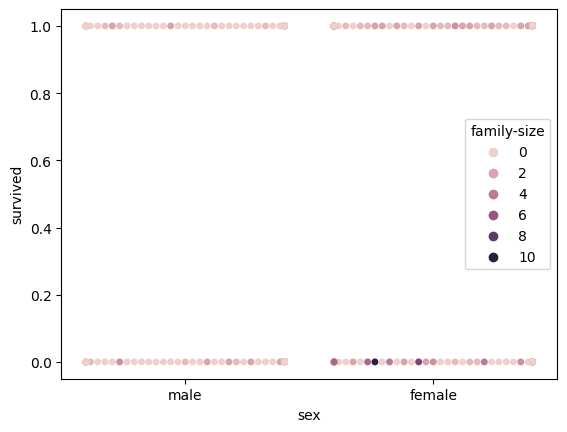

In [356]:
sns.swarmplot(data = df, x='sex', y='survived', hue='family-size')

In [357]:
df = df.rename(columns=({'survived': 'survival'}))
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family-size'],
      dtype='object')

In [358]:
# to summarize we use pivot table..
# in this pivot table is telling us fare ka sum based on pclass
pd.pivot_table(df, values='fare', index='pclass',
  columns = 'who', aggfunc = np.sum)

who,child,man,woman
pclass,,,
1,10.140948,395.391529,367.141184
2,3.403555,233.734545,182.705566
3,23.390463,551.211226,247.165499


<Axes: xlabel='fare', ylabel='age'>

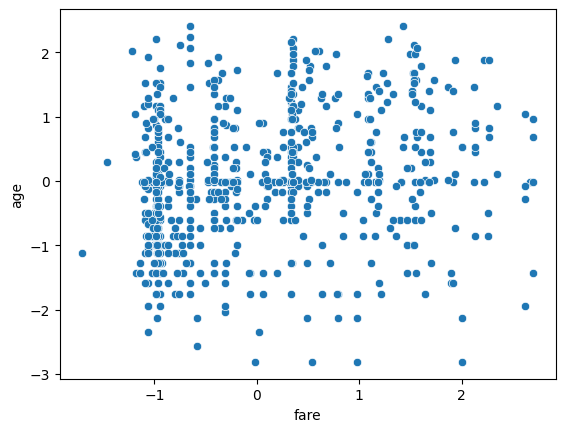

In [324]:
sns.scatterplot(data = df , x= 'fare', y='age')

In [360]:
df.head(30)

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family-size
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,Southampton,no,False,1
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,Southampton,no,True,0
5,0,3,male,3.391117,0,0,2.135148,Q,Third,man,True,Queenstown,no,True,0
6,0,1,male,3.988984,0,0,3.948596,S,First,man,True,Southampton,no,True,0
8,1,3,female,3.295837,0,2,2.409941,S,Third,woman,False,Southampton,yes,False,2
9,1,2,female,2.639057,1,0,3.403555,C,Second,child,False,Cherbourg,yes,False,1
11,1,1,female,4.060443,0,0,3.279030,S,First,woman,False,Southampton,yes,True,0


In [273]:
df.to_csv('preprocessed data.csv')

In [326]:
df.to_excel('preprocessed data by me.xlsx')